# Draw

In [164]:
import numpy  as np
from copy import copy

import random
import math
from math import sin, cos, radians
import itertools
from more_itertools import pairwise

from random import random, shuffle, uniform, randint
from io import BytesIO

import cairo
import IPython.display
import PIL
import PIL.Image
import PIL.ImageFilter

In [165]:
XMAX = 100
XMIN = -95

YMAX = 185
YMIN = -90

XMID = (XMAX + XMIN) / 2.0
YMID = (YMAX + YMIN) / 2.0

WIDTH = XMAX - XMIN
HEIGHT = YMAX - YMIN

PEN_DELAY = 125

START_X = 0
START_Y = -200

WIDTH, HEIGHT

(195, 275)

In [166]:
def clamp(value, min_value, max_value):
    return min(max(value, min_value), max_value)

In [167]:
class GCODE:
    def __init__(self, name="foobar", feedrate=1000):
        self.start_pos = np.array([START_X, START_Y])
        self.pos = copy(self.start_pos)
        self.f = open(f"{name}.gcode", "wt")
        self.feedrate = feedrate
        
        self.servo = "P0"
        self.pen_up_pos = "S0"
        self.pen_down_pos = "S90"
         
        self.f.write("M17\n")  # Ensure steppers are enabled
        self.f.write("M121\n")  # Disable endstops, just in case
        self.f.write("G90\n")  # Set absolute positioning
        self.f.write("; potatolangelo\n")
        self.pen_up()
        self.move_to_starting_position()
        
    def pen_up(self):
        self.finish_moves()
        self.f.write(f"M280 {self.servo} {self.pen_up_pos} T{PEN_DELAY}\n")
    
    def pen_down(self):
        self.finish_moves()
        self.f.write(f"M280 {self.servo} {self.pen_down_pos} T{PEN_DELAY}\n")
        
    def finish_moves(self):
        self.f.write("M400\n")
        
    def move_to(self, x, y, feedrate=None):
        feedrate = feedrate or self.feedrate
        
        x = clamp(x, XMIN, XMAX)
        y = clamp(y, YMIN, YMAX)
        
        self.pos[0] = x
        self.pos[1] = y
        
        self.f.write(f"G0 X{x} Y{y} F{feedrate}\n")
        
    def move_to_mid_point(self, feedrate=None):
        self.move_to(XMID, YMID, feedrate=feedrate)
        
    def move_to_starting_position(self, feedrate=None):
        self.move_to(START_X, START_Y, feedrate=feedrate)
        
    def step(self, dx, dy, feedrate=None):
        feedrate = feedrate or self.feedrate
        self.pos[0] += dx
        self.pos[1] += dy
        
        x = self.pos[0]
        y = self.pos[1]
        x = clamp(x, XMIN, XMAX)
        y = clamp(y, YMIN, YMAX)
        self.pos[0] = x
        self.pos[1] = y
        
        self.f.write(f"G0 X{x} Y{y} F{feedrate}\n")
        
    def square_filled(self, xmin, ymin, xmax, ymax, dy=1, zigzag=True):
#         print(f"square filled centered on {(xmin + xmax) / 2.0:.2f} {(ymin + ymax) / 2.0:.2f}")
        
        self.pen_up()    
        self.move_to((xmin + xmax) / 2.0, (ymin + ymax) / 2.0)
        
        self.square(xmin, ymin, xmax, ymax)
        
        self.pen_up()    
        self.move_to(xmin, ymin)
        self.pen_down()
        
        x = xmin
        y = ymin
        while y < ymax:
            y += dy
            
            # When zigzag is true the pen moves in a saw tooth pattern,
            # otherwise it goes in a square wave form.
            # Zigzag looks good with ballpoint pens, while the square pattern
            # works best on thicker points.
            if not zigzag:
                self.move_to(x, y)
            
            if x == xmin:
                x = xmax
            else:
                x = xmin
                
            self.move_to(x, y)
            
        self.pen_up()
                
    def square(self, xmin, ymin, xmax, ymax):
        return
        self.move_to(xmin, ymin)
        self.pen_down()
        self.move_to(xmax, ymin)
        self.move_to(xmax, ymax)
        self.move_to(xmin, ymax)
        self.move_to(xmin, ymin)
        self.pen_up()
        
    def line(self, x1, y1, x2, y2):
        self.pen_up()
        self.move_to(x1, y1)
        self.pen_down()
        self.move_to(x2, y2)
        self.pen_up()
        
    def draw_boundaries(self):
        self.square(XMIN, YMIN, XMAX, YMAX)
            
    def flush(self):
        self.f.flush()

# The drawing algo

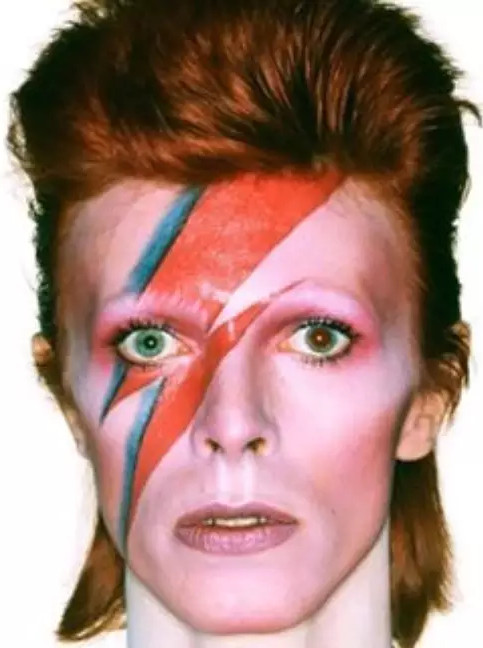

In [168]:
# image_name = "images/flor.jpg"
# image_name = "images/this_dumb_fuckery_again.png"
# image_name = "images/girl-with-a-pearl-earring.png"
image_name = "images/david-bowie.jpg"
# image_name = "images/einstein_mad.png"
# image_name = "images/cutie.png"
# image_name = "images/hack.png"
# image_name = "images/squares.jpg"
# image_name = "images/full-moon-with-face.png"

IPython.display.Image(filename=image_name) 

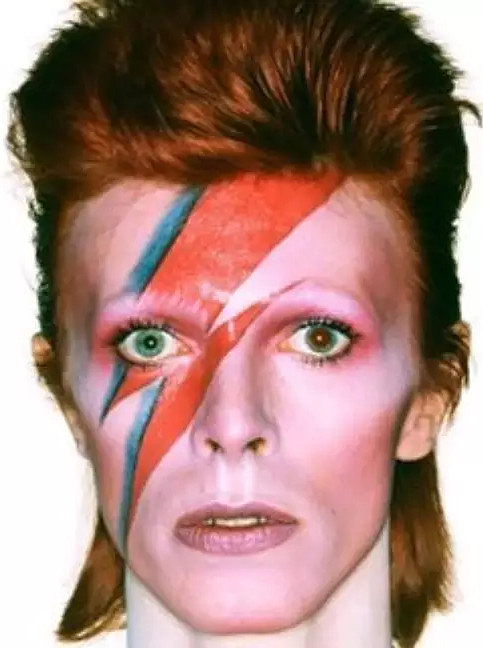

In [169]:
original_image = PIL.Image.open(image_name)
image = copy(original_image)

width = original_image.width
height = original_image.height

scale = 1

image = image.resize((int(width / scale), int(height / scale)), PIL.Image.ANTIALIAS)

# image = image.filter(PIL.ImageFilter.EDGE_ENHANCE_MORE)
# image = image.filter(PIL.ImageFilter.SMOOTH_MORE)
# image = image.filter(PIL.ImageFilter.SMOOTH_MORE)

# image = image.filter(PIL.ImageFilter.CONTOUR)
# image = image.filter(PIL.ImageFilter.CONTOUR)

image = image.filter(PIL.ImageFilter.DETAIL)

# image = image.filter(PIL.ImageFilter.SMOOTH_MORE)
# image = image.filter(PIL.ImageFilter.CONTOUR)

# image = image.filter(PIL.ImageFilter.EDGE_ENHANCE)

# image = image.filter(PIL.ImageFilter.EDGE_ENHANCE_MORE)

# image = image.rotate(-90, expand=True)

image = image.convert("RGB")
# image = image.convert("L")

# image = image.point(lambda p: p > 135 and 255)  

IPython.display.display(image)

In [170]:
basename = "this_dumb_fuckery_again"

gcode = GCODE(basename, feedrate=3500)
gcode.move_to_starting_position()
gcode.pen_down()
gcode.draw_boundaries()
gcode.pen_up()

width = image.width
height = image.height
noise = 0

In [171]:
def build_layer(threshold, step_size, angle):
    cx = image.width / 2
    cy = image.height / 2
    i = 0
    
    while True:
        x = cx + i * step_size * sin(radians(angle + 90))
        y = cy + i * step_size * cos(radians(angle + 90))
         
        if x < 0 or x >= image.width or y < 0 or y >= image.height:
            break
            
        draw_lines(
            x, y,
            threshold=threshold, step_size=step_size, angle=angle
        )
        draw_lines(
            x, y,
            threshold=threshold, step_size=step_size, angle=angle + 180
        )
        
        i += 1
       
    i = 0
    while True: 
        x = cx - i * step_size * sin(radians(angle + 90))
        y = cy - i * step_size * cos(radians(angle + 90))
         
        if x < 0 or x >= image.width or y < 0 or y >= image.height:
            break
            
        draw_lines(
            x, y,
            threshold=threshold, step_size=step_size, angle=angle
        )
        draw_lines(
            x, y,
            threshold=threshold, step_size=step_size, angle=angle + 180
        )
        
        i += 1
        

def draw_lines(x, y, angle, threshold, step_size):
    # Dumb way to find where the line intercepts any border of the image
    # Could be done by solving a simple affine equation, but it is too late in the night to think
    while x < 0 or x >= image.width or y < 0 or y >= image.height:
        x += step_size * sin(-radians(angle))
        y += step_size * cos(-radians(angle))
        
    writing = False
    while True:
        r, g, b = image.getpixel((x, y))
        intensity = ((255 - r) + (255 - g) + (255 - b)) / (255 * 3.0)

        if not writing and intensity > threshold:
            writing = True
            gcode.move_to(
                ((x + uniform(-noise, noise)) / image.width) * (XMAX - XMIN) + XMIN, 
                ((y + uniform(-noise, noise)) / image.height) * (YMAX - YMIN) + YMIN,
            )
            gcode.pen_down()
        elif writing and intensity < threshold:
            writing = False
            gcode.move_to(
                ((x + uniform(-noise, noise)) / image.width) * (XMAX - XMIN) + XMIN, 
                ((y + uniform(-noise, noise)) / image.height) * (YMAX - YMIN) + YMIN,
            )
            gcode.pen_up()
            
        x += step_size * sin(radians(angle))
        y += step_size * cos(radians(angle))
        if x < 0 or x >= image.width or y < 0 or y >= image.height:
            break


    # Ensure we finish any last line that might end in the border
    if writing:
        gcode.move_to(
            ((x + uniform(-noise, noise)) / image.width) * (XMAX - XMIN) + XMIN, 
            ((y + uniform(-noise, noise)) / image.height) * (YMAX - YMIN) + YMIN,
        )
        gcode.pen_up()

In [172]:
# build_layer(threshold=0.75, angle=45, step_size=3)
# build_layer(threshold=0.50, angle=45 + 90, step_size=5)
# build_layer(threshold=0.25, angle=0, step_size=11)
# build_layer(threshold=0.25, angle=90, step_size=11)

# build_layer(threshold=0.85, angle=uniform(0, 180), step_size=1)
build_layer(threshold=0.7, angle=uniform(0, 180), step_size=3)
build_layer(threshold=0.6, angle=uniform(0, 180), step_size=3)
build_layer(threshold=0.5, angle=uniform(0, 180), step_size=3)
# build_layer(threshold=0.50, angle=uniform(0, 180), step_size=2)
# build_layer(threshold=0.60, angle=uniform(0, 180), step_size=3)
# build_layer(threshold=0.32, angle=uniform(0, 180), step_size=8)
# build_layer(threshold=0.25, angle=uniform(0, 180), step_size=11)
# build_layer(threshold=0.20, angle=uniform(0, 180), step_size=13)

# n_layers = 10
# min_threshold = 0.3
# max_threshold = 0.9
# min_step_size = 17
# max_step_size = 2

# for i in range(n_layers):
#     threshold = round(min_threshold + (i / (n_layers - 1)) * (max_threshold - min_threshold), 2)
#     step_size = round(min_step_size + (i / (n_layers - 1)) * (max_step_size - min_step_size))
#     print(i, threshold, step_size)
#     build_layer(threshold=threshold, angle=uniform(0, 180), step_size=step_size)

In [173]:
gcode.pen_up()
gcode.move_to_starting_position()
gcode.flush()

# Preview

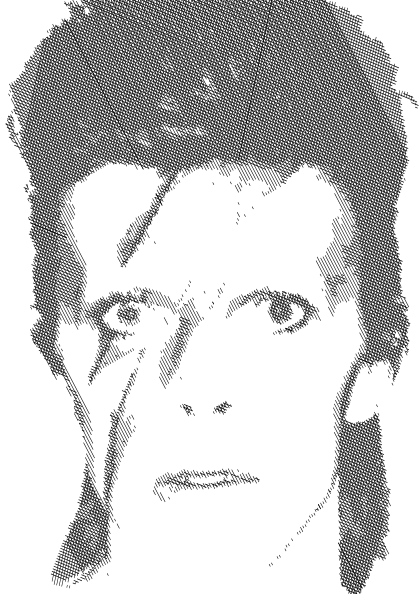

In [174]:
svgio = BytesIO()
filename = f"{basename}.gcode"

last_x = (START_X - XMIN) / (XMAX - XMIN)
last_y = (START_Y - YMIN) / (YMAX - YMIN)

width = 210 * 2
height = 297 * 2

with cairo.SVGSurface(svgio, width, height) as surface, open(filename) as f:
    context = cairo.Context(surface)
    context.scale(width, height)
    context.set_line_width(0.00125)
    context.set_source_rgba(0, 0, 0, 1)
    
    for line in f.readlines():
        if "G0" in line:
                
            tokens = line.strip().split(" ")[1:]
            x = (float(tokens[0][1:]) - XMIN) / (XMAX - XMIN)
            y = (float(tokens[1][1:]) - YMIN) / (YMAX - YMIN)

            if writing:  
                context.move_to(last_x, last_y)
                context.line_to(x, y)
                context.stroke()

            last_x = x
            last_y = y
            
        if "M280 P0" in line:
            tokens = line.strip().split(" ")[1:]
            if tokens[1] == "S0":
                writing = False
            elif tokens[1] == "S90":
                writing = True

IPython.display.SVG(data=svgio.getvalue())